<a href="https://colab.research.google.com/github/gideonkipkorir/Sentimental-Analysis-based-on-tweet-feeds/blob/master/Sentimental_Analysis_based_on_tweet_feeds_Power_Team_MasterFile_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement:
Build a model that classifies tweets whether they are positive, negative or neutral sentiments.


# Metric of sucess
Build a model with above 80% accuracy that can classify tweets into negative, positive and neutral sentiments.

#Understanding the Context
Kenyan bankers wants to improve the interactions with their users on Twitter. Optimising on twitter interaction is important because  users can be, consumers, potential consumers,business parters or potential business parters. By classifying the tweets we can help the relevant department addressing emerging and pressing issues affecting the users


#Experimental Design
> 
1. Scraping for tweets from twitter
2. Basic clean( removing puctuations, username, hashtags, url links)
3. Labeling of tweets
4. Undertaking Exploratory data analysis
5. Build a baseline model.
6. Improve the model












#Data relevance

Data source: data was sourced from twitter

The relavance of our data will be answered by the following questions.

How accurate is the data?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

# From the ideation sheet(we use as a guide./scope)
- Modelling report detailing the modelling process. Algorithm choosen, Metric choosen etc plus correctly identify reasons for positive sentiments and negative sentiments. I.e top 3 reasons for positive/negative sentiment.

#Tweets mining

In [0]:
#Importing Libariries
import pandas as pd
import numpy as np

import json
import csv
import tweepy
import re
import datetime


In [0]:
# pip install tweepy

In [0]:
import os
import tweepy as tw
import pandas as pd

In [0]:
#getting authorizations
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [0]:
#searching for tweets
# Define the search term and the date_since date as variables
search_words = "@National_Bank"
date_since = "2019-09-01" 


In [70]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",tweet_mode="extended").items(10000)
tweets

In [71]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(10000)

# Iterate and print tweets
tweets_text = [[tweet.text, tweet.user.location,tweet.created_at] for tweet in tweets]
tweets_text


[['@National_Bank hey kindly check your DM and please respond I will appreciate',
  '',
  datetime.datetime(2020, 5, 26, 14, 1, 23)],
 ['@National_Bank Why do the app keeps telling me that I should change my PIN?',
  'Mombasa, Kenya',
  datetime.datetime(2020, 5, 26, 13, 52, 48)],
 ['RT @National_Bank: Do not let their learning be interrupted. Make online payments at the comfort of your home! #staysafe https://t.co/MdAot…',
  'Quarantine, #StayHome ',
  datetime.datetime(2020, 5, 26, 12, 42, 35)],
 ['@National_Bank Harambe avenue should be closed... One teller serving over 20 customers.. Issa disgrace',
  'nairobi',
  datetime.datetime(2020, 5, 26, 10, 46, 26)],
 ['hey @National_Bank kindly check DM',
  'Nairobi, Kenya',
  datetime.datetime(2020, 5, 26, 10, 0, 37)],
 ['RT @National_Bank: Do not let their learning be interrupted. Make online payments at the comfort of your home! #staysafe https://t.co/MdAot…',
  '',
  datetime.datetime(2020, 5, 26, 9, 49, 55)],
 ['@National_Bank i opene

In [72]:
tweets = pd.DataFrame(data=tweets_text, 
                    columns=['text', "location", 'Date'])
tweets.to_csv('National.csv')
tweets.shape


(93, 3)

In [0]:
#Absa
Absa = pd.read_csv('/content/Absa.csv')
Bank = []
a= np.arange(len(Absa))
for row in a:
  Bank.append('Absa Bank')
Absa['Bank'] = Bank
#kcb
KCB = pd.read_csv('/content/KCB.csv')
kcb = []
b = np.arange(len(KCB))
for row in b:
  kcb.append('KCB Bank')
KCB['Bank'] = kcb

# #Ncba
cba= pd.read_csv('/content/CBA.csv')
ca= pd.read_csv('/content/cA.csv')
Ncba = pd.concat([cba, ca], axis = 0).reset_index()
cb = []
b = np.arange(len(Ncba))
for row in b:
  cb.append('NCBA Bank')
Ncba['Bank'] = cb
# #i&m bank
im= pd.read_csv('/content/I&M.csv')
bank = []
b = np.arange(len(im))
for row in b:
  bank.append('I&M Bank')
im['Bank'] = bank
#Stanbic bank
stb= pd.read_csv('/content/Stanbic.csv')
bank = []
b = np.arange(len(stb))
for row in b:
  bank.append('Stanbic Bank')
stb['Bank'] = bank
#Coop bank
Coop= pd.read_csv('/content/Coop.csv')
bank = []
b = np.arange(len(Coop))
for row in b:
  bank.append('Co_operative Bank')
Coop['Bank'] = bank
#Stanchart bank
Stanchart= pd.read_csv('/content/Stanchart.csv')
bank = []
b = np.arange(len(Stanchart))
for row in b:
  bank.append('Stanchart Bank')
Stanchart['Bank'] = bank
#National
na= pd.read_csv('/content/Stanchart.csv')
bank = []
b = np.arange(len(na))
for row in b:
  bank.append('National Bank')
na['Bank'] = bank
#equity
Equity= pd.read_csv('/content/Equity.csv')
bank = []
b = np.arange(len(Equity))
for row in b:
  bank.append('Equity Bank')
Equity['Bank'] = bank

Concatinating the datasets

In [0]:
bk_tweets = pd.concat([stb, im, Ncba, KCB, Equity, Absa, Coop, Stanchart,na],axis =0).reset_index()
bk_tweets.head()
bk_tweets.to_csv('Bks_tweets.csv')


In [81]:
#Checking for nul values
tweets_text = pd.read_csv('/content/Bks_tweets.csv', index_col = 0)
tweets_text.isnull().sum()

level_0            0
Unnamed: 0.1       0
text               0
location        1925
Date               0
Bank               0
index           6618
dtype: int64

In [82]:
tweets_text.shape

(7571, 7)

In [83]:
#droping columns that have many missing values
tweets_text =tweets_text.drop(columns = ['location','index'])
tweets_text.text[3]

'RT @RichFrontiers: Banking Stocks in 2020 (YTD)\n@StanChartKE -8.77%\n@imbankke -9.35%\n@StanbicKE -12.36%\n@DTBKenya -19.50%\n@BankofKigali -20…'

#cleaning

In [0]:
#preprocessing
tweets_text['text'] = tweets_text['text'].str.replace('@[A-Za-z0–9]+', ' ')#removing @user
tweets_text['text'] = tweets_text['text'].str.replace('#[A-Za-z0–9]+', ' ')#removing hashtags
tweets_text['text'] = tweets_text['text'].str.replace('<[^>]+>', ' ' )
tweets_text['text'] = tweets_text['text'].str.replace("\s+[a-zA-Z]\s+", ' ')
tweets_text['text'] = tweets_text['text'].str.replace('[^a-zA-Z]', ' ')#removing numbers

# tweets_text['text'] = tweets_text['text'].str.replace('\'\w+', ' ') #removing such puntuctions
tweets_text['text'] = tweets_text['text'].str.replace('https?://\S+|www\.\S+', '')#removing url links
tweets_text['text'] = tweets_text['text'].str.replace('rt', ' ')
# tweets_text['text'] = tweets_text['text'].str.replace('kcbgroup', ' ')

tweets_text['text'] = tweets_text['text'].str.replace('ref  no', ' ')
tweets_text['text'] = tweets_text['text'].str.replace('kindly', ' ')
tweets_text['text'] = tweets_text['text'].str.replace('aren t','are not')
tweets_text['text'] = tweets_text['text'].str.replace('can t','can not')
tweets_text['text'] = tweets_text['text'].str.replace('don ','do not')
tweets_text['text'] = tweets_text['text'].str.replace('isnt','is not')
#  Converting all characters in the message to lower case
# tweets_text['text'] = tweets_text['text'].map(lambda x: x.lower())
tweets_text = tweets_text.drop_duplicates()# removing duplicates
# tweet_text['text'] = tweet_text['text'].str.replace('KCB-\[0-9]\[a-zA-Z0-9]', ' ')


In [85]:
tweets_text.sample(5)

,level_0,Unnamed: 0.1,text,Date,Bank
2623,1422,1422,How long do need to save with you to have bu...,2020-04-03 08:32:55,KCB Bank
988,740,635,Yep like Vikram Pandit CEO of Citigroup ...,2020-04-03 09:35:16,NCBA Bank
5040,1143,1143,On it,2020-04-02 05:20:14,Equity Bank
4717,820,820,need help from here,2020-04-03 17:04:06,Equity Bank
6453,583,583,And if dial it says you are unable to ...,2020-04-03 07:09:31,Co_operative Bank


In [86]:
tweets_text.to_csv('cleaned_tweets.csv')
tweets_text.shape

(7571, 5)

In [87]:
tweets = pd.read_csv('/content/cleaned_tweets.csv', index_col = 0, parse_dates=['Date'])
tweets = tweets.drop(columns = (['Unnamed: 0.1','level_0']), axis = 1)
tweets.head()

,text,Date,Bank
0,is this twitter account of yours functional ...,2020-04-07 07:22:58,Stanbic Bank
1,RT Banking Stocks in YTD ...,2020-04-07 07:06:59,Stanbic Bank
2,RT Banking Stocks in YTD ...,2020-04-07 06:56:13,Stanbic Bank
3,RT Banking Stocks in YTD ...,2020-04-07 06:51:00,Stanbic Bank
4,RT Banking Stocks in YTD ...,2020-04-07 06:50:45,Stanbic Bank


In [0]:
#Further  Cleaning
tweets['text'] = tweets['text'].str.replace('https co', ' ')
tweets['text'] = tweets['text'].str.replace('isn', 'is not')
tweets['text'] = tweets['text'].str.replace('https co', ' ')
tweets['text'] = tweets['text'].str.replace('https', ' ')
tweets['text'] = tweets['text'].str.replace('nott', 'not ')


In [89]:
tweets.info()# checking data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7571 entries, 0 to 7570
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   text    7571 non-null   object        
 1   Date    7571 non-null   datetime64[ns]
 2   Bank    7571 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 236.6+ KB


In [0]:
tweets['text'] = tweets['text'].astype(str) #converting tweets text into string datatype

In [91]:
tweets.nunique()# identifying unique tweets to eliminate retweets


text    4897
Date    6067
Bank       9
dtype: int64

In [0]:
tweets= tweets.drop_duplicates(['text'])[['Date','Bank','text' ]].reset_index() #droping duplicate tweets

In [93]:
tweets.head()

,index,Date,Bank,text
0,0,2020-04-07 07:22:58,Stanbic Bank,is this twitter account of yours functional ...
1,1,2020-04-07 07:06:59,Stanbic Bank,RT Banking Stocks in YTD ...
2,9,2020-04-07 06:42:47,Stanbic Bank,Banking Stocks in YTD ...
3,10,2020-04-07 06:38:08,Stanbic Bank,reply to my Dm
4,11,2020-04-07 05:21:54,Stanbic Bank,RT It s in moments like these when we need ...


In [94]:
tweets.nunique()

index    4897
Date     4870
Bank        8
text     4897
dtype: int64

In [95]:
tweets.shape

(4897, 4)

#Sentiment scoring

## sentiment scoring using TextBlob

In [0]:
import nltk
from textblob import TextBlob

In [97]:
#example, Using textBlox to get text polarity
text = "i do not hate you"
print(text)
print(TextBlob(text).sentiment.polarity)

i do not hate you
0.4


not bad , it is above 0 so it would be classified as positive which is pretty acurate

In [0]:
tweets['sentiment_textblob'] = tweets['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [99]:
tweets.sample(4)

,index,Date,Bank,text,sentiment_textblob
1914,3042,2020-04-02 04:26:03,KCB Bank,Aty have changed my handset,0.0
4445,6632,2020-04-01 12:11:52,Co_operative Bank,Kindly have question answer me on DM,0.6
2683,4022,2020-04-06 10:29:48,Equity Bank,how can link my account to my PayPal so can ...,0.0
1328,2351,2020-04-04 06:18:15,KCB Bank,RT can you get your National Bank websit...,0.0


In [100]:
tweets['text'][6]

'  Am great full to offer Kenyans this great oppo unity to showcase their products on the only  Made in Af      t co MuKzfSr ZB'

In [101]:
a = np.arange(11)# reading the first 11 texts
for i in a:
  print(tweets['text'][i])
  i += 1

  is this twitter account of yours functional  You do not  reply to Dm nor tweets
RT    Banking Stocks in       YTD                                              
Banking Stocks in       YTD                                             t co pTTKw H wv
  reply to my Dm
RT    It s in moments like these when we need to look out for silver lining  What are you grateful for today  Share with us in t 
  was this loan repayment break hoax or just public show off   
  Am great full to offer Kenyans this great oppo unity to showcase their products on the only  Made in Af      t co MuKzfSr ZB
  Can you answer my DM   am kind of disappointed with customercare    it automated care   losing touch with working class
    advise on how long it takes your bank to resolve customer queries because made mine over mont      t co Ft LtURyLq
    provide the following details for your garden city branch      Local routing number   swift code    Address Thank you
RT       New Expo  Orders Index           t co so

## Sentiment Scoring with Vader

the above score would have been classified as positive yet in the real sense it is a negative sentiment. so lets have tried vadersentiment

In [102]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 4.9MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser= SentimentIntensityAnalyzer()

In [104]:
x ='kindly reply to my dm' # testing with tweets with polite connotations
analyser.polarity_scores(x)['compound']

0.4939

In [105]:
print(tweets['text'][3])
print('polarity score:', analyser.polarity_scores(tweets['text'][3])['compound'])

  reply to my Dm
polarity score: 0.0


a negative score makes it a negative sentiment which is pretty accurate according to the above sentence

In [0]:
tweets['sentiment_vader'] = tweets['text'].apply(lambda tweet: analyser.polarity_scores(tweet)['compound'])

In [107]:
tweets.head()


,index,Date,Bank,text,sentiment_textblob,sentiment_vader
0,0,2020-04-07 07:22:58,Stanbic Bank,is this twitter account of yours functional ...,0.0,0.0000
1,1,2020-04-07 07:06:59,Stanbic Bank,RT Banking Stocks in YTD ...,0.0,0.0000
2,9,2020-04-07 06:42:47,Stanbic Bank,Banking Stocks in YTD ...,0.0,0.0000
3,10,2020-04-07 06:38:08,Stanbic Bank,reply to my Dm,0.0,0.0000
4,11,2020-04-07 05:21:54,Stanbic Bank,RT It s in moments like these when we need ...,0.0,0.7717


In [112]:
# print(tweets['text'][2272])
print(analyser.polarity_scores(tweets['text'][2272])['compound'])
tweets['text'][2272]

0.0


'  did you check the time when sent you the tweet '

In [113]:
tweets.nunique()

index                 4897
Date                  4870
Bank                     8
text                  4897
sentiment_textblob     292
sentiment_vader        495
dtype: int64

In [114]:
print(tweets.isnull().sum())

index                 0
Date                  0
Bank                  0
text                  0
sentiment_textblob    0
sentiment_vader       0
dtype: int64


In [0]:
tweets['sentiment_textblob'] = tweets['sentiment_textblob'].astype(int)

In [116]:
tweets.shape

(4897, 6)

# compound score metric
* positive sentiment: compound score > 0.05 > 
* Neutral sentiment : compound score < 0.05< & >=-0.05 
* negative score: compound score < 0.05 

In [0]:
# def sentiment_generator():
tweet_sentiment = []
for score in tweets['sentiment_vader']:
  if score > 0.05:
    tweet_sentiment.append('positive')
  elif score < 0.05 and score >= -0.05:
    tweet_sentiment.append('neutral')
  elif score < -0.05:
    tweet_sentiment.append('negative')
  else:
      tweet_sentiment.append(np.nan)
 

VADER is a better too for sentiment scoring since to some extent it recognizes context. It puts into account puntcuation and capitalized words that bear strong emotions.

In [118]:
tweets.shape

(4897, 6)

In [0]:
# sentiment_generator()
tweets['tweet_sentiment'] = tweet_sentiment

In [120]:
tweets.head()

,index,Date,Bank,text,sentiment_textblob,sentiment_vader,tweet_sentiment
0,0,2020-04-07 07:22:58,Stanbic Bank,is this twitter account of yours functional ...,0,0.0000,neutral
1,1,2020-04-07 07:06:59,Stanbic Bank,RT Banking Stocks in YTD ...,0,0.0000,neutral
2,9,2020-04-07 06:42:47,Stanbic Bank,Banking Stocks in YTD ...,0,0.0000,neutral
3,10,2020-04-07 06:38:08,Stanbic Bank,reply to my Dm,0,0.0000,neutral
4,11,2020-04-07 05:21:54,Stanbic Bank,RT It s in moments like these when we need ...,0,0.7717,positive


In [121]:
tweets = tweets.dropna()
tweets.isnull().sum()

index                 0
Date                  0
Bank                  0
text                  0
sentiment_textblob    0
sentiment_vader       0
tweet_sentiment       0
dtype: int64

In [122]:
#Making a comparison between textBlob and Vader in sentiment scoring
dm = tweets[tweets['sentiment_vader'] <= -0.05]
dm.sample(20)


,index,Date,Bank,text,sentiment_textblob,sentiment_vader,tweet_sentiment
4596,6799,2020-03-31 08:10:21,Co_operative Bank,RT No need to visit the branch to send mone...,0,-0.2960,negative
2920,4703,2020-04-04 03:20:09,Equity Bank,Yeah right after days go to hell,0,-0.5267,negative
4110,6232,2020-04-06 07:01:50,Co_operative Bank,The contribution is expected to suppo the s...,0,-0.3182,negative
2210,3429,2020-04-01 07:16:11,KCB Bank,Up to date my problem hasn t been solved yet,0,-0.1531,negative
2614,3937,2020-04-07 05:05:45,Equity Bank,Dear today marks three days since made reque...,0,-0.1084,negative
2029,3208,2020-04-01 13:31:16,KCB Bank,have called times Waited min on hold te...,0,-0.2960,negative
3785,5763,2020-03-31 16:46:37,Absa Bank,Still waiting no update,0,-0.2960,negative
4705,6956,2020-04-05 05:46:19,Stanchart Bank,My mobile banking access was blocked because...,0,-0.2263,negative
1613,2684,2020-04-03 04:53:43,KCB Bank,Stuck too,0,-0.2500,negative
2364,3614,2020-03-31 13:55:36,KCB Bank,is their problem with network coz nimetuma p...,0,-0.2144,negative


Surprisingly it correctly classified some tweets kiswahili words

In [123]:
print(tweets.text[3644])

RT   Pyrotech    Launch In Nairobi By   Pyrotech At   Using    amp   D Projection Mapping     


In [0]:
tweets.to_csv('bank_tweets.csv')

## Modelling 

In [125]:
!nvidia-smi #checking properties of the allocated gpu

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [126]:
!pip install gdown
!pip install tensorflow_text

     |████████████████████████████████| 3.0MB 5.1MB/s 


In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 42kB/s 


In [127]:
!pip install wordcloud

In [128]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [129]:
bank_twts = pd.read_csv('/content/bank_tweets.csv', index_col = 0, parse_dates=['Date'])
bank_twts.head()

,index,Date,Bank,text,sentiment_textblob,sentiment_vader,tweet_sentiment
0,0,2020-04-07 07:22:58,Stanbic Bank,is this twitter account of yours functional ...,0,0.0000,neutral
1,1,2020-04-07 07:06:59,Stanbic Bank,RT Banking Stocks in YTD ...,0,0.0000,neutral
2,9,2020-04-07 06:42:47,Stanbic Bank,Banking Stocks in YTD ...,0,0.0000,neutral
3,10,2020-04-07 06:38:08,Stanbic Bank,reply to my Dm,0,0.0000,neutral
4,11,2020-04-07 05:21:54,Stanbic Bank,RT It s in moments like these when we need ...,0,0.7717,positive


#Data understanding

In [130]:
#data types
bank_twts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 0 to 4896
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               4896 non-null   int64         
 1   Date                4896 non-null   datetime64[ns]
 2   Bank                4896 non-null   object        
 3   text                4896 non-null   object        
 4   sentiment_textblob  4896 non-null   int64         
 5   sentiment_vader     4896 non-null   float64       
 6   tweet_sentiment     4896 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 306.0+ KB


In [131]:
bank_twts.isnull().sum()

index                 0
Date                  0
Bank                  0
text                  0
sentiment_textblob    0
sentiment_vader       0
tweet_sentiment       0
dtype: int64

In [132]:
#Checking for duplicates
print('No of Duplicates values:', bank_twts.duplicated().sum())
print('**************************************************')
#Unique values
print('Unique values')
print(bank_twts.nunique())

No of Duplicates values: 0
**************************************************
Unique values
index                 4896
Date                  4869
Bank                     8
text                  4896
sentiment_textblob       3
sentiment_vader        494
tweet_sentiment          3
dtype: int64


In [133]:
bank_twts.columns

Index(['index', 'Date', 'Bank', 'text', 'sentiment_textblob',
       'sentiment_vader', 'tweet_sentiment'],
      dtype='object')

#Feature engineering

In [0]:
bank_twts = bank_twts.set_index('Date')


In [0]:
bank_twts['year'] = bank_twts.index.year
bank_twts['month'] = bank_twts.index.month
bank_twts['weekday_name'] = bank_twts.index.day_name()
bank_twts['year quarters'] = bank_twts.index.quarter

In [136]:
#droping index column
tweets = bank_twts
tweets.head()

,index,Bank,text,sentiment_textblob,sentiment_vader,tweet_sentiment,year,month,weekday_name,year quarters
Date,,,,,,,,,,
2020-04-07 07:22:58,0,Stanbic Bank,is this twitter account of yours functional ...,0,0.0000,neutral,2020,4,Tuesday,2
2020-04-07 07:06:59,1,Stanbic Bank,RT Banking Stocks in YTD ...,0,0.0000,neutral,2020,4,Tuesday,2
2020-04-07 06:42:47,9,Stanbic Bank,Banking Stocks in YTD ...,0,0.0000,neutral,2020,4,Tuesday,2
2020-04-07 06:38:08,10,Stanbic Bank,reply to my Dm,0,0.0000,neutral,2020,4,Tuesday,2
2020-04-07 05:21:54,11,Stanbic Bank,RT It s in moments like these when we need ...,0,0.7717,positive,2020,4,Tuesday,2


#Expolatory Data Analysis

## Univariate Analysis

In [143]:
#descriptive statistics
cat_df = bank_twts[['Bank', 'text','weekday_name', 'tweet_sentiment' ]]
cat_df.describe()

,Bank,text,weekday_name,tweet_sentiment
count,4896,4896,4896,4896
unique,8,4896,7,3
top,KCB Bank,This is unacceptable Where is the government ...,Monday,neutral
freq,1861,1,947,1978


* Kcb has the most tweets
* Most tweets are posted on monday
* Most tweets are neutral

In [144]:
 num_df =bank_twts[['year',	'month',	'year', 'year quarters']]
 num_df.describe()

,year,month,year,year quarters
count,4896.0,4896.000000,4896.0,4896.000000
mean,2020.0,3.826185,2020.0,1.826185
std,0.0,0.378989,0.0,0.378989
min,2020.0,3.000000,2020.0,1.000000
25%,2020.0,4.000000,2020.0,2.000000
50%,2020.0,4.000000,2020.0,2.000000
75%,2020.0,4.000000,2020.0,2.000000
max,2020.0,4.000000,2020.0,2.000000


In [0]:
tweets.month = tweets.month.replace({3:'March',4: 'April'})

* Most tweets are from the year 2020
* April has the highest number of tweets
* The second quarter of the year had the higest number of tweets

##Data Exploration

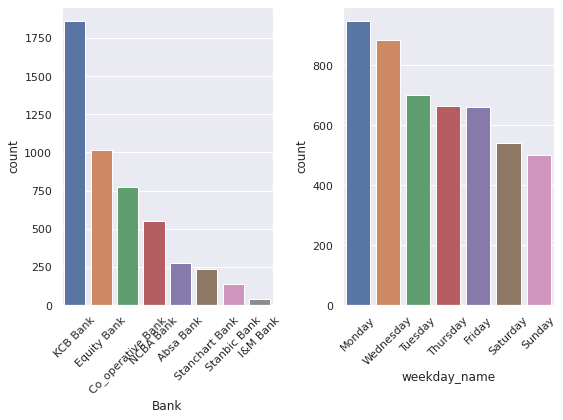

In [146]:
fig, axs = plt.subplots(nrows= 1, ncols = 2, figsize=(8,6))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
ax= sns.countplot(x="Bank", data=cat_df, order=cat_df.Bank.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.subplot(1,2,2)
ax = sns.countplot(x="weekday_name", data=cat_df, order=cat_df.weekday_name.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.tight_layout()
plt.show();
fig.savefig('twst&weekdays.png')

* KCB had the most tweets
* I&M  had the least tweets

* Banks receive most tweets on monday and Wednesday
* Banks receives least tweets during weekends(Saturday and Sunday)

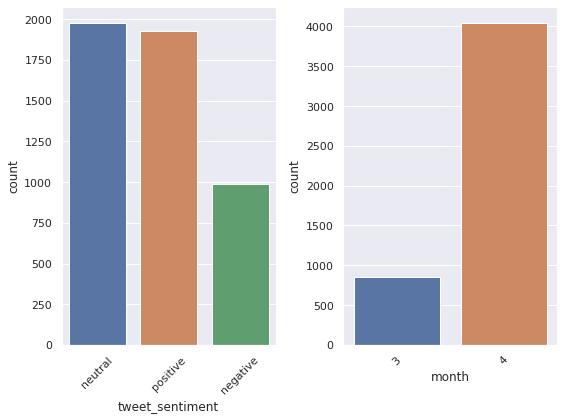

In [147]:

fig, axs = plt.subplots(nrows= 1, ncols = 2, figsize=(8,6))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
ax= sns.countplot(x='tweet_sentiment', data=tweets)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.subplot(1,2,2)
ax = sns.countplot(x='month', data = tweets)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.tight_layout()
plt.show();
fig.savefig('twst&periods.png')

* Second quarter has more tweets than the first quarter

## Bivariate Analysis

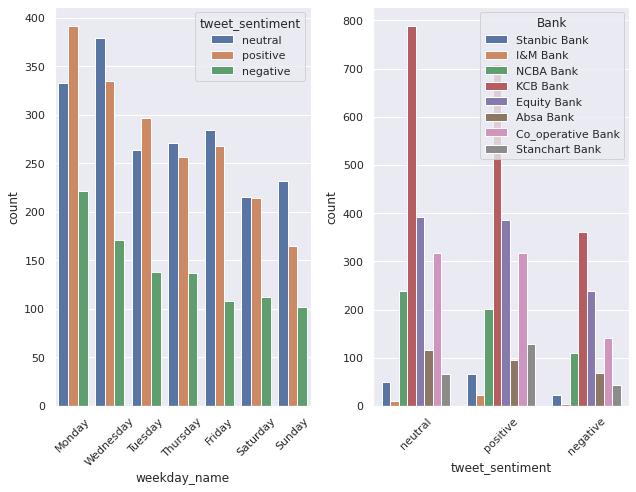

<Figure size 432x288 with 0 Axes>

In [148]:
fig, axs = plt.subplots(nrows= 1, ncols = 2, figsize=(9,7))
plt.subplot(1,2,1)
ax = sns.countplot(x="weekday_name", hue = 'tweet_sentiment',data=cat_df, order=cat_df.weekday_name.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.subplot(1,2,2)
ax = sns.countplot(x="tweet_sentiment", hue = 'Bank',data=tweets, order=tweets.tweet_sentiment.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.tight_layout()
plt.show()
plt.savefig('senti')

#Multivariate Analysis

###conclusion

Found no correlations among the features

In [149]:
#understanding each reveiw
post_senti = tweets[tweets['tweet_sentiment']=='positive']#Subsetting positive sentiments
print('positive steiments:',post_senti.shape)
neg_senti = tweets[tweets['tweet_sentiment']== 'negative']#Subsetting negative sentiments
print('negative sentiments:', neg_senti.shape)
neu_senti = tweets[tweets['tweet_sentiment']== 'neutral']#Subsetting neutral sentiments
print('neutral sentiments:',neu_senti.shape)

positive steiments: (1928, 10)
negative sentiments: (990, 10)
neutral sentiments: (1978, 10)


## Converting the counts inro percentages for better comaprison

In [0]:
per = tweets.groupby([ 'tweet_sentiment','Bank'])['text'].count()
percentage = []
sentiment = []
bank = []
for i, v in per.items():
  sentiment.append(i[0])
  bank.append(i[1:2])
  if i[0] == 'negative':
    percentage.append(round(v/len(neg_senti)*100,2))
  elif i[0]== 'positive':
    percentage.append(round(v/len(post_senti)*100, 2))
  elif i[0] == 'neutral':
    percentage.append(round(v/len(neu_senti)*100,2))


In [151]:
p_df = pd.DataFrame(percentage, columns = ['percentage'])
p_df['Bank']= bank
p_df['Sentiment'] = sentiment
p_df.to_csv('percentages.csv')
p_df.head()

,percentage,Bank,Sentiment
0,6.87,"(Absa Bank,)",negative
1,14.34,"(Co_operative Bank,)",negative
2,24.14,"(Equity Bank,)",negative
3,0.40,"(I&M Bank,)",negative
4,36.57,"(KCB Bank,)",negative


AttributeError: ignored

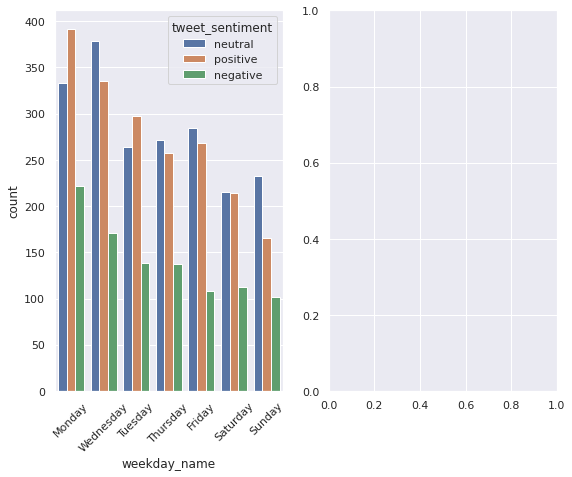

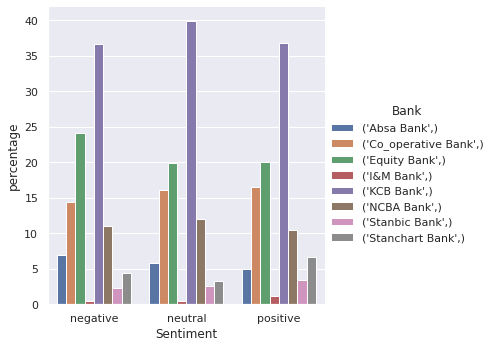

In [152]:
fig, axs = plt.subplots(nrows= 1, ncols = 2, figsize=(9,7))
plt.subplot(1,2,1)
ax = sns.countplot(x="weekday_name", hue = 'tweet_sentiment',data=cat_df, order=cat_df.weekday_name.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.subplot(1,2,2)
ax = sns.catplot(x="Sentiment", y="percentage", hue="Bank", kind="bar", data=p_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.tight_layout()
plt.show()

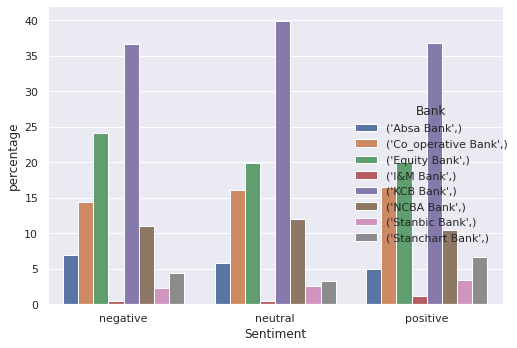

In [153]:
# ax = ax.FacetGrid( figsize =(15,10) )
ax= sns.catplot(x="Sentiment", y="percentage", hue="Bank", kind="bar", data=p_df)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show();

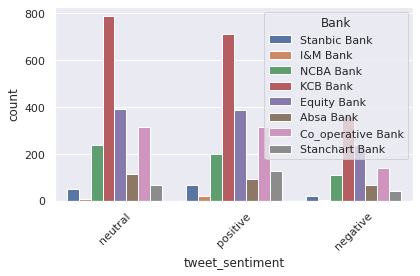

In [154]:
ax = sns.countplot(x="tweet_sentiment", hue = 'Bank',data=tweets, order=tweets.tweet_sentiment.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.tight_layout()
plt.show()

In [155]:
#balancing the data
p_tweets = post_senti.sample(len(neg_senti))
n_tweets = neu_senti.sample(len(neg_senti))
balanced_tweets = pd.concat([p_tweets, n_tweets, neg_senti], axis= 0).reset_index()
balanced_tweets.shape

(2970, 11)

We might need tom balance our data, neutral tweets are less by half compared to postive sentiments

In [0]:
post_senti  = " ".join(post_senti.text.to_numpy().tolist())
neg_senti  = " ".join(neg_senti.text.to_numpy().tolist())
neu_senti  = " ".join(neu_senti.text.to_numpy().tolist())

In [0]:
post_senti_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(post_senti)
neg_senti_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neg_senti)
neu_senti_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neu_senti)

In [0]:
def show_word_cloud(cloud, title):
  plt.figure(figsize = (16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();

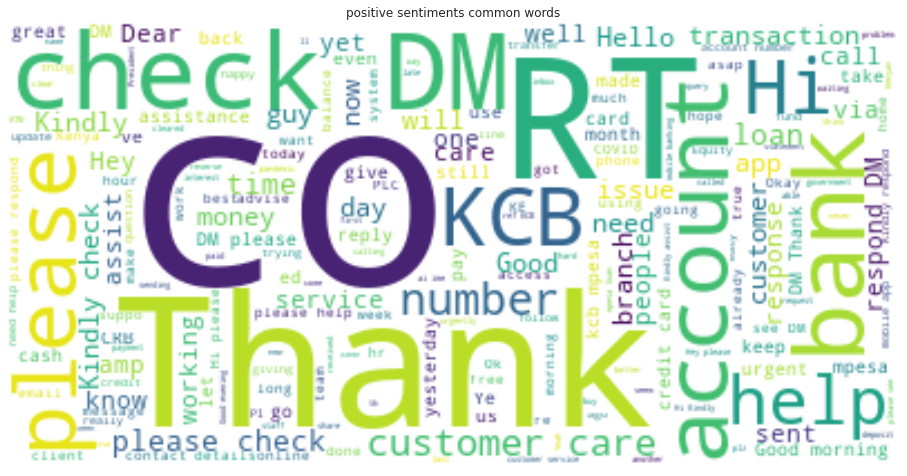

In [160]:
show_word_cloud(post_senti_cloud, "positive sentiments common words")

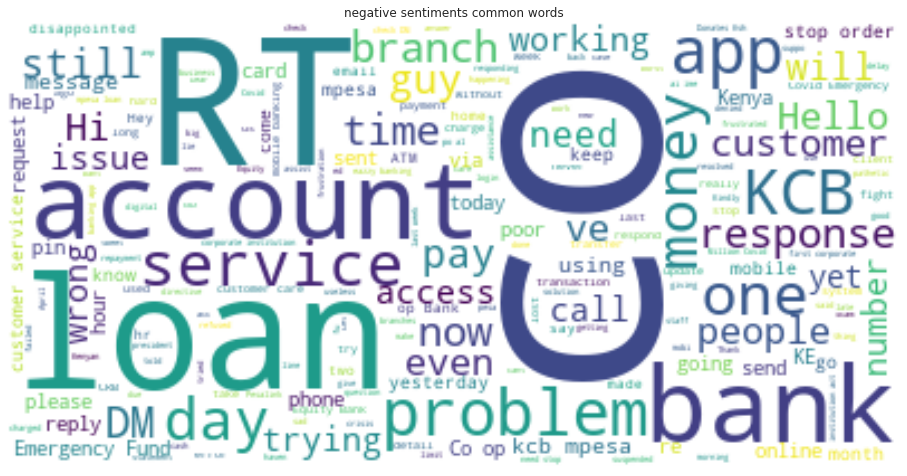

In [161]:
plt.figure(figsize = (16,10))
plt.imshow(neg_senti_cloud, interpolation = 'bilinear')
plt.title('negative sentiments common words')
plt.axis('off')
plt.show();

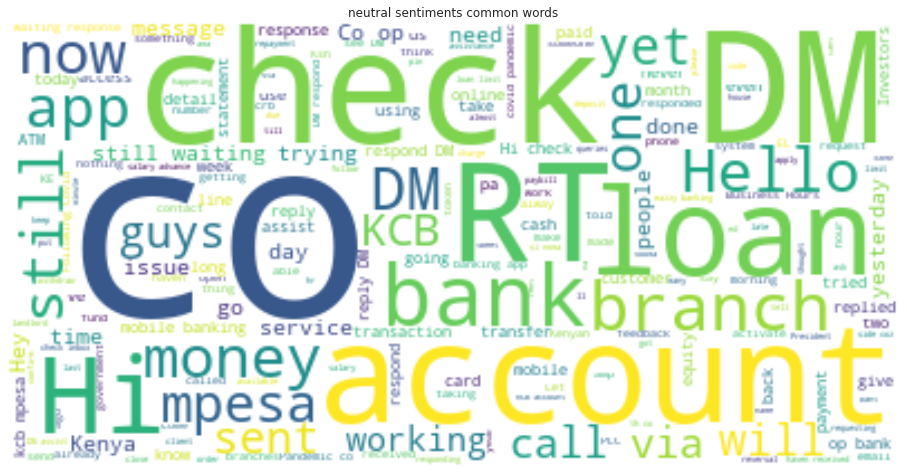

In [162]:
plt.figure(figsize = (16,10))

plt.imshow(neu_senti_cloud, interpolation = 'bilinear')
plt.title('neutral sentiments common words')
plt.axis('off')
plt.show()

##Comparison of Common negative words for two Banks

In [0]:
neg_t  = tweets[tweets['tweet_sentiment']=='negative']
neg_kcb = neg_t[neg_t['Bank']=='KCB Bank']#Subsetting Tweets for KCb
neg_im = neg_t[neg_t['Bank']== 'I&M Bank']#Subsetting Tweets for i&m
#Converting words into list of numbers
neg_kcb  = " ".join(neg_kcb.text.to_numpy().tolist())
neg_im = " ".join(neg_im.text.to_numpy().tolist())
#Removing stop words and putting them into word cloud
neg_kcb_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neg_kcb)
neg_im_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neg_im)

##KCB and I& M comparison of negatrive tweets on wordcloud

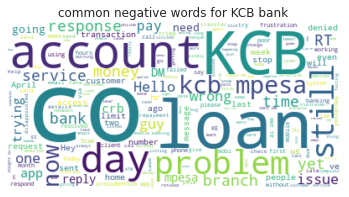

In [164]:
# fig = plt.subplots(nrows=1, ncols=2, sharex='col', figsize = (10,8))
#K
# plt.subplot(1, 2,1)
plt.imshow(neg_kcb_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('common negative words for KCB bank ')
plt.show();

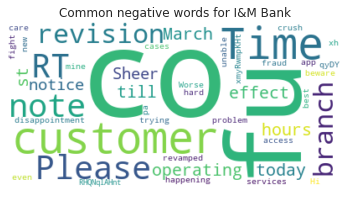

In [165]:
#I&M bank
# plt.subplot(1,2,1)
# plt.fig = plt.subplots(nrows = 1, ncols = 2, figsize= (8,6))
# plt.subplot(1,2,1)
plt.imshow(neg_im_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Common negative words for I&M Bank')
plt.show();

### KCB Bank

for KCB, Items that get reported frequently include,
* KCB Mpesa and mobile application services 
* Brach services
* Loan/Mpesa account problems
* Time taken in responding to their direct messages(Dm)

### I&M Bank

Negative tweets are about
* Customer services
* Branch services
* App(believed to be mobile application)

#Comparison of positive tweets between KCB and I&M banks

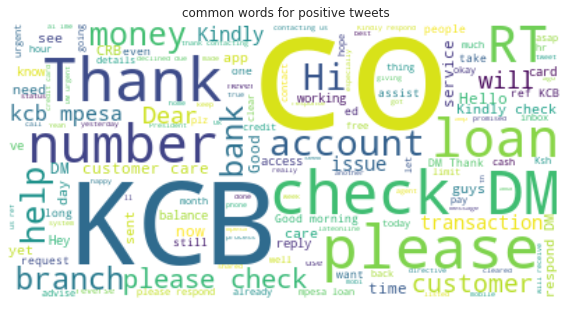

In [166]:
ve = tweets[tweets.tweet_sentiment=='positive']
post_kcb = ve[ve['Bank']=='KCB Bank']#Subsetting Tweets for KCb
post_im = ve[ve['Bank']== 'I&M Bank']#Subsetting Tweets for i&m
#Converting words into list of numbers
post_kcb  = " ".join(post_kcb.text.to_numpy().tolist())
post_im = " ".join(post_im.text.to_numpy().tolist())
#Removing stop words and putting them into word cloud
post_kcb_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(post_kcb)
post_im_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(post_im)
#Visiualizing common words, KCB
plt.figure(figsize = (10,8))
plt.imshow(post_kcb_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('common words for positive tweets')
plt.show()

common positive tweets for I&M Bank

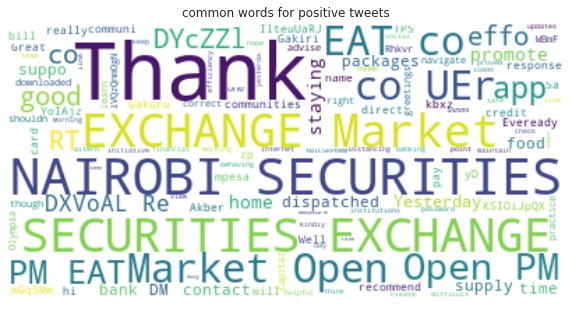

In [167]:
#Visiualizing common words, I&M Bank
plt.figure(figsize = (10,8))
plt.imshow(post_im_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('common words for positive tweets')
plt.show();

#Universal sentence encoder
encoding sentences using the universal sentence encoder

In [0]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [0]:
#Preprocessing
from sklearn.preprocessing import OneHotEncoder

y = OneHotEncoder(sparse=False).fit_transform(
  balanced_tweets.tweet_sentiment.to_numpy().reshape(-1, 1)
)

In [0]:
#Spliting the dataset into train and test datasets
x_train, x_test, y_train,y_test = train_test_split(balanced_tweets['text'], y, test_size = 0.1, random_state =45)

In [0]:
#sentence encoding x_train tweets
X_train = []
for tweets in tqdm(x_train):
  emb = use(tweets)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

100%|██████████| 2670/2670 [02:26<00:00, 18.25it/s]


In [0]:
#sentence encoding x_test tweets
X_test = []
for r in tqdm(x_test):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 297/297 [00:16<00:00, 18.31it/s]


In [0]:
print(X_train.shape, y_train.shape)

(2632, 512) (2632, 3)


In [0]:
print(X_test.shape, y_test.shape)


(293, 512) (293, 3)


#Training with neural networks

In [0]:
model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.75
)
)
model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.7)
)

model.add(keras.layers.Dense(3, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [0]:
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=16, 
    validation_split=0.2, 
    verbose=1, 
    shuffle=True
)

Train on 2105 samples, validate on 527 samples
Epoch 1/10
2105/2105 [==============================] - 1s 450us/sample - loss: 1.0748 - accuracy: 0.3981 - val_loss: 0.9962 - val_accuracy: 0.5863
Epoch 2/10
2105/2105 [==============================] - 0s 222us/sample - loss: 0.9527 - accuracy: 0.5306 - val_loss: 0.8349 - val_accuracy: 0.6452
Epoch 3/10
2105/2105 [==============================] - 0s 222us/sample - loss: 0.8515 - accuracy: 0.6048 - val_loss: 0.7505 - val_accuracy: 0.6907
Epoch 4/10
2105/2105 [==============================] - 1s 252us/sample - loss: 0.7879 - accuracy: 0.6542 - val_loss: 0.6882 - val_accuracy: 0.7002
Epoch 5/10
2105/2105 [==============================] - 0s 232us/sample - loss: 0.7461 - accuracy: 0.6836 - val_loss: 0.6717 - val_accuracy: 0.7097
Epoch 6/10
2105/2105 [==============================] - 0s 226us/sample - loss: 0.6923 - accuracy: 0.7036 - val_loss: 0.6520 - val_accuracy: 0.7154
Epoch 7/10
2105/2105 [==============================] - 0s 230us/

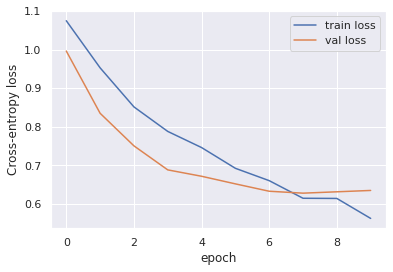

In [0]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

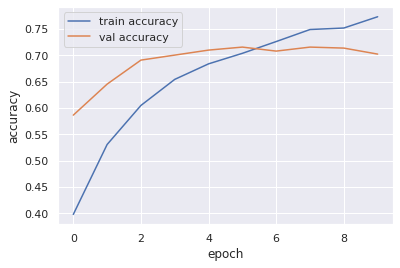

In [0]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

In [0]:
model.evaluate(X_test, y_test)

293/293 [==============================] - 0s 73us/sample - loss: 0.6104 - accuracy: 0.7372


[0.6103826395073848, 0.7372014]

#Conclusion

1.   Customers experience problems with their mobile application 
2. customers face challenges on bank/mpesa and loan related services 
3. customers complain about getting response to their direct messages(dm)
4. Customers sometimes face problems with their branches
5. Most customers run to the customer care for help.



# Recommendations

*   Improve customer care services
*   use additinal tools such as chatbots to respond and record customers' complain/feedback
* Countinously improve user interface for their mobile applications
* Create user-self-help systems that provide quick fix for common recurring problems that can be help customers unblock themselves


